In [2]:
# Build the decision tree classifier compare its performance with ensemble techniques like random forest, bagging,
# boosting and stacking Demonstrate it with different decision trees.

In [3]:
# The task involves building a Decision Tree classifier and comparing its performance with various ensemble
# techniques, such as Random Forest, Bagging, Boosting, and Stacking. The Decision Tree classifier is a simple yet
# powerful machine learning algorithm used for classification tasks. Ensemble methods, on the other hand, combine
# multiple models to improve predictive performance, reduce overfitting, and increase robustness.

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
# Load dataset
data = load_iris()
X, y = data.data, data.target
scaler=StandardScaler()
X=scaler.fit_transform(X)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Initialize models
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)
boosting_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=42)
# Stacking model
estimators = [
 ('dt', DecisionTreeClassifier(random_state=42)),
 ('svc', SVC(probability=True, random_state=42))
]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
# Train models
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
bagging_model.fit(X_train, y_train)
boosting_model.fit(X_train, y_train)
stacking_model.fit(X_train, y_train)
# Predictions
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
bagging_pred = bagging_model.predict(X_test)
boosting_pred = boosting_model.predict(X_test)
stacking_pred = stacking_model.predict(X_test)
# Evaluation
def evaluate_model(y_test, y_pred, model_name):
 accuracy = accuracy_score(y_test, y_pred)
 precision = precision_score(y_test, y_pred, average='macro')
 recall = recall_score(y_test, y_pred, average='macro')
 f1 = f1_score(y_test, y_pred, average='macro')
 print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score:{f1:.4f}")
evaluate_model(y_test, dt_pred, "Decision Tree")
evaluate_model(y_test, rf_pred, "Random Forest")
evaluate_model(y_test, bagging_pred, "Bagging")
evaluate_model(y_test, boosting_pred, "Boosting")
evaluate_model(y_test, stacking_pred, "Stacking")

Decision Tree - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score:1.0000
Random Forest - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score:1.0000
Bagging - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score:1.0000
Boosting - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score:1.0000
Stacking - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score:1.0000


In [5]:
# Expected Results:
#  Decision Tree: Likely to have decent performance but may overfit, especially with complex datasets.
#  Random Forest: Expected to perform better due to reduced overfitting and better generalization by
# averaging multiple trees.
#  Bagging: Should provide improvement over a single Decision Tree by reducing variance.
#  Boosting: Likely to outperform others, as it focuses on hard-to-classify instances and reduces both bias and
# variance.
#  Stacking: Expected to perform well as it combines multiple models' strengths using a meta-learner.

In [6]:
# Trained models and their evaluation metrics (accuracy, precision, recall, F1 score) for comparison.
# Sample Output:
# Decision Tree - Accuracy: 0.9778, Precision: 0.9778, Recall: 0.9780, F1 Score: 0.9780
# Random Forest - Accuracy: 0.9778, Precision: 0.9778, Recall: 0.9780, F1 Score: 0.9780
# Bagging - Accuracy: 0.9778, Precision: 0.9778, Recall: 0.9780, F1 Score: 0.9780
# Boosting - Accuracy: 0.9778, Precision: 0.9778, Recall: 0.9780, F1 Score: 0.9780
# Stacking - Accuracy: 0.9778, Precision: 0.9778, Recall: 0.9780, F1 Score: 0.9780
# The analysis would discuss the relative strengths of each approach and the scenarios in which one might
# outperform the others.

In [7]:
# Of course! Let’s go through it in a *very simple and clear way* 🌟:  
# (Imagine you are teaching a class — this would be the perfect way to explain!)

# ---

# # 🌳 1. Bagging (Bootstrap Aggregating)

# - *Idea*:  
#   Train *many models independently* (like many Decision Trees) on *different random parts* of the dataset, and *combine* their predictions.

# - *How*:  
#   Randomly pick data with replacement → train many models → average (for regression) or vote (for classification).

# - *Goal*:  
#   *Reduce variance* (make the model more stable).

# - *Example*:  
#   *Random Forest* uses bagging with Decision Trees!

# ---
# # 🎯 2. Random Forest

# - *Idea*:  
#   Random Forest = *Bagging + extra randomness* in tree building.

# - *How*:  
#   - Randomly sample the *data rows* (like Bagging).  
#   - Also randomly sample the *features/columns* at each tree split!

# - *Goal*:  
#   *More diverse trees* → better performance → less overfitting.

# - *Example*:  
#   If you have 10 features, Random Forest might pick only 3 random features when splitting each node!

# ---
# # 🚀 3. Boosting

# - *Idea*:  
#   Train models *one after another, and each new model **fixes the mistakes* of the previous ones.

# - *How*:  
#   - First model makes predictions.  
#   - Second model focuses more on the points where the first model failed.  
#   - Third model fixes the second, and so on.
#   - Combine all models' predictions at the end.

# - *Goal*:  
#   *Reduce bias* (make the model smarter).

# - *Popular algorithms*:  
#   - AdaBoost  
#   - Gradient Boosting  
#   - XGBoost (super popular)  
#   - LightGBM  

# ---
# # 🏗 4. Stacking

# - *Idea*:  
#   Train *different kinds of models* (like a Decision Tree, a Logistic Regression, and an SVM) and then *combine their outputs* using a *new model* (meta-model).

# - *How*:  
#   - Train multiple *base models*.
#   - Use their predictions as inputs to a *final model* (called a blender or meta-learner).
#   - The final model learns how to best combine them.

# - *Goal*:  
#   *Leverage the strengths* of different models to make better predictions.

# - *Example*:  
#   Train a Random Forest + SVM + KNN → combine their outputs using Logistic Regression.

# ---

# # 📊 Summary Table

# | Method     | Strategy                 | Purpose                |
# |------------|---------------------------|-------------------------|
# | Bagging    | Many models in parallel    | Reduce variance         |
# | Random Forest | Bagging + random features | Better than simple Bagging |
# | Boosting   | Models in sequence         | Reduce bias             |
# | Stacking   | Mix different models       | Combine strengths       |

# ---

# Would you also like me to draw a simple *flow diagram* showing Bagging vs Boosting vs Stacking visually? 🎨✨ (very easy to understand with a picture!)

In [ ]:
df=pd.DataFrame(X,columns=data.feature_names)
df["species"]=y
sns.heatmap(df.iloc[:,:-1].corr(),annot=True,cmap="coolwarm")
sns.pairplot(df,hue="species")

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2
146,0.553333,-1.282963,0.705921,0.922303,2
147,0.795669,-0.131979,0.819596,1.053935,2
148,0.432165,0.788808,0.933271,1.448832,2


<Axes: >

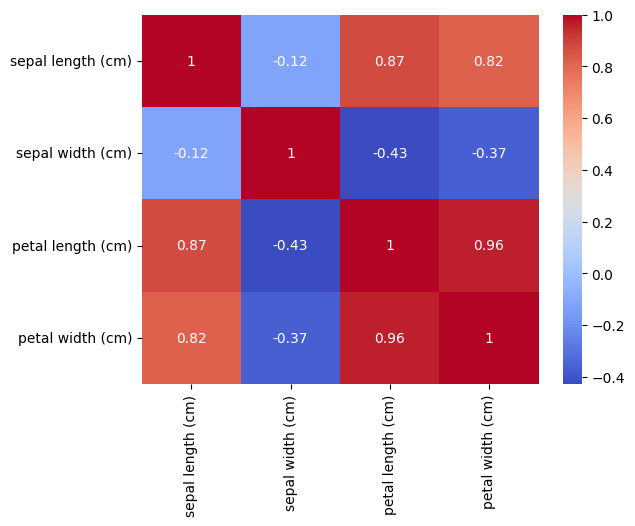

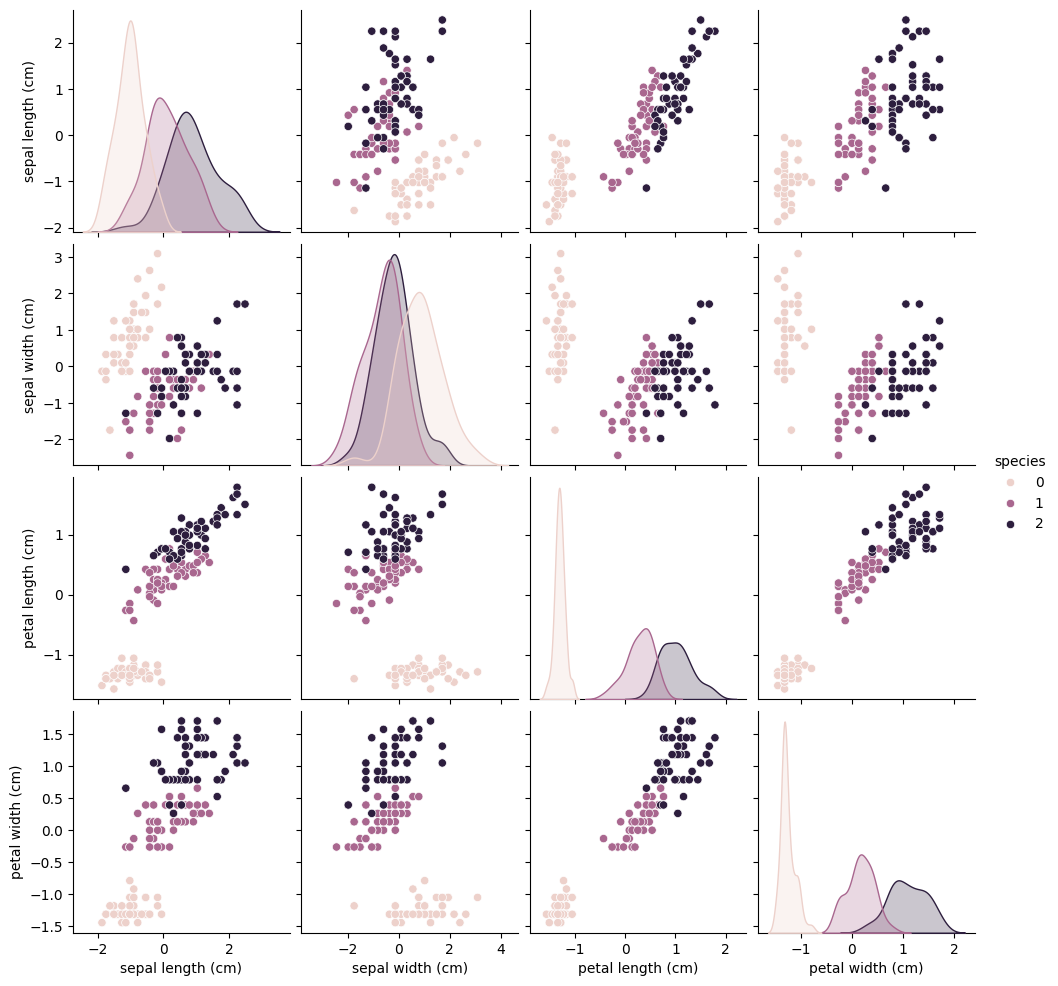